<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/DynamicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Dynamic Modeling

<p class='vspace'>The focus of this course is on modeling, simulation, estimation, and optimization of dynamic systems. This section of the course starts with dynamic modeling or methods to mathematically describe time-evolving systems, particularly for the purpose of dynamic optimization in engineering disciplines. The examples are particularly focused on engineering applications although much of the theory and applications can also be applied to other fields as well.
</p>
<div class='vspace'></div><ul><li><a class='urllink' href='http://apmonitor.com/do/uploads/Main/Intro_Dynamic_Modeling.pdf' rel='nofollow'>Introduction to Dynamic Modeling (pdf)</a>
</li></ul><div class='vspace'></div>

In [0]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/VRs9gX6r1Ng?rel=0" frameborder="0" allowfullscreen></iframe>

<p class='vspace'>The discussion starts with modeling because a reasonably accurate model of the system must first be created to approximate input to output relationships between values that can be adjusted (inputs) and those values that are used to judge the desirability of solution (outputs).
</p>



## Dynamic Systems

Dynamic systems can often be described with differential equations. The equations can either be derived empirically from data or from fundamental relationships. One example of fundamental relationships are equations of motion for an object in a friction-less environment in one dimension. In this case velocity (v) is the equal to the time-derivative of position (y) and acceleration (a) is the time-derivative of velocity.

$dy/dt = v$

$dv/dt = a$

The above differential equations are expressed in semi-explicit form where the derivative terms are isolated on the left side of the equation and all other variables are on the right side of the expression. A more general notation for the semi-explicit form is dx/dt = f(x,p) where f(x,p) is any combination of variables (x) or parameters (p). Variables (x) are those values that are determined by the solution of the equations while parameters (p) are those quantities that are either specified by a user or determined by an optimizer. A more general form for differential equations is the open-equation format as f(dx/dt,x,p)=0 where all terms are brought to one side of the equation.


$ dx/dt = f(x,p) $, Semi-Explicit Form

 $f(dx/dt,x,p)=0$, Open Equation Form
 
 

In the case of the object motion, the acceleration is not typically manipulated directly but may be adjusted by a force that is acting on that object. The relationship between acceleration (a) and force (F) includes another parameter, the mass of the object (m). There are now three equations that describe the motion of the system and relate force (F) to acceleration (a), velocity (v), and position (y).

$F = m a$

 $dy/dt = v$
 
 $dv/dt = a$
 
The equation F = m a is an algebraic equation with no differential terms. While it would be simple to eliminate a from the equation by substituting for F/m, suppose that it is not possible or convenient to rearrange the equations to eliminate the algebraic expressions. This collection of equations is now referred to as Differential Algebraic Equations (DAEs). When there are no algebraic expressions, the system of equations are simplified to Ordinary Differential Equations (ODEs). If the differential equations have spatial and temporal derivatives, they become Partial Differential Equations (PDEs). For the purpose of this modeling discussion, any PDEs are discretized in space to return to ODE or DAE form where only time derivatives (not spatial derivatives) are present.

##Dynamic versus Steady State

Dynamic systems are those where values that describe the system are expected to evolve over time and not necessarily remain at a steady state. When a dynamic system is at steady state, all time derivative values are either set to zero (dx/dt=0) or do not otherwise appear in the equations.

**Steady state: Values (x) do not change with time**

**Dynamic: At least one value (x) changes with time**

For physical systems the values of x may be measured at specific times. For virtual or simulated dynamic systems there can either be analytic solutions or a numerical solution.

##Analytic Solution

An exact solution x(t) may exist from an analytic approach to solving the differential equations. In the in example case, the solution is found by integrating both sides of the differential equations. With the object initially at rest, this translates to zero initial conditions. An initial condition must be specified for each differential variable (those variables that appear in differential terms). In this case, the acceleration a is determined by the first equation but does not appear in differential form such as da/dt. Values of the parameters must be specified over the selected integration time horizon. The time horizon spans from the initial time where the initial conditions are specified to a future time tf. Suppose there is a constant force (F=5) applied to the body starting at t0=0. The analytic solution is then solved as a function of time.

 $a = F/m$
 
 $v = a t + v0$
 
$y = a t2/2 + v0 t + y0$

Notice that the initial condition for acceleration (a0) does not appear in the solution but initial conditions for velocity (v0) and position (y0) do influence the solution. If the force (F) changes at any time in the future, the time horizon is divided into separate segments where the force is constant. The first segment is computed and the final values become the initial values for the next segment.

##Numerical Solution

Another method to solve dynamic system is with a numerical approach that approximates the exact solution x(t) at discrete time intervals, much like measuring a physical system at particular time points. The numerical approach is able to solve much larger and more complex systems of equations, especially when the exact analytic solution does not exist. One drawback to numerical solutions is that the accuracy of the solution is not exact and depends on factors such as the discretization methods employed and the error tolerance of the solver before convergence is confirmed.

~~Excel~~, ~~MATLAB~~, Python, ~~and Simulink~~ are used in the following example to solve the differential equation that describes the velocity of a vehicle.

In [0]:
#@markdown Solution Video

%%html
<div class='vspace'></div><div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/simulate_vehicle.zip' rel='nofollow'>Simulate with Excel, MATLAB, Python, and Simulink</a></div>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/y0ERNz5Kms8?rel=0" frameborder="0" allowfullscreen></iframe>


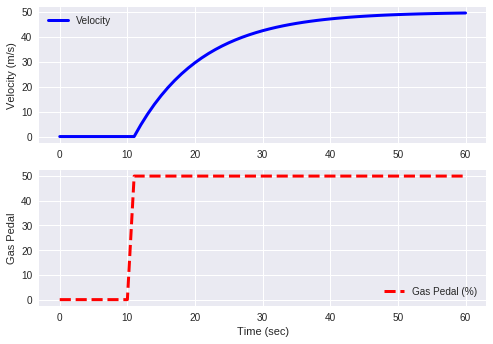

In [0]:
#@markdown Solution using python ODEINT
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def vehicle(v,t,p):
    m = 500 # Mass (kg)
    b = 50  # Resistive coefficient (N-s/m)  
    K = 1.0 # Gain (m/s-%pedal)
    
    # calculate derivative of the velocity
    dv_dt = (b/m) * (-v + (K *p))
    return dv_dt

tf = 60.0                 # final time for simulation
nsteps = 61               # number of time steps
delta_t = tf/(nsteps-1)   # how long is each time step?
ts = np.linspace(0,tf,nsteps) # linearly spaced time vector

# simulate step test operation
step = np.zeros(nsteps) # u = valve % open
step[11:] = 50.0       # step up pedal position

#time
t = [0.0,delta_t]

# velocity initial condition
v0 = 0.0

# for storing the results
vs = np.zeros(nsteps)

# simulate with ODEINT
for i in range(nsteps-1):
    p = step[i]
    v = odeint(vehicle,v0,t,args=(p,))
    v0 = v[-1]   # take the last value
    vs[i+1] = v0 # store the velocity for plotting
  
# plot results
plt.figure()

plt.subplot(2,1,1)
plt.plot(ts,vs,'b-',linewidth=3)
plt.ylabel('Velocity (m/s)')
plt.legend(['Velocity'],loc=2)
plt.subplot(2,1,2)
plt.plot(ts,step,'r--',linewidth=3)
plt.ylabel('Gas Pedal')    
plt.legend(['Gas Pedal (%)'])
plt.xlabel('Time (sec)')
plt.show()

##Mathematical Description of Dynamic Systems

Models are not just equations but are collections of assumptions, mathematical expressions, boundary conditions, initial conditions, and constraints. These mathematical expressions can range from a simple equation of motion for an object in a frictionless environment to complex systems that describe multi-body physics and interactions. A standard model form is shown below:

 $0 = f(dx/dt,x,p)$
 
 $0 < g(dx/dt,x,p)$

In this case, the differential and algebraic equations are condensed into $f(dx/dt,x)$ and any algebraic expressions simply omit the derivative terms. Expressions may either be equality (f) or inequality (g) constraints.


#Exercise

**Objective:** Provide a basic introduction to dynamic system modeling and simulation with the equations of motion. Create a MATLAB (ode23, ode15s, etc) or Python (ODEINT) script to simulate and display the results. Simulate with APM MATLAB, APM Python, or Python GEKKO as well. Compare the sequential (ODE integrators in MATLAB / Python) versus the simultaneous method (APMonitor). Observe how the number of time points in APMonitor affects the solution accuracy. 

*Estimated Time: 1 hour*

Predict the position and velocity of a skydiver in two dimensions (horizontal and vertical) from the time of the initial jump through the first 90 seconds. At 60 seconds after the jump, the skydiver pulls the chute and the drag coefficient increases to slow the decent. The airplane is flying at a constant altitude of 5000 meters and 50 m/s when the skydiver jumps. The drag coefficient is 0.2 N-s2/m2 while free-falling and 10 N-s2/m2 with the parachute open. The gravitational constant is 9.8 m/s2 and the mass is 80 kg for the skydiver and chute.



In [0]:
#@markdown ##Solution

%%html
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/simulate_skydiver.zip' rel='nofollow'>Skydiver Simulation in MATLAB and Python</a></div>
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/2FeOaGUQwKA?rel=0" frameborder="0" allowfullscreen></iframe>


This problem can also be solved with an ODE integrator such as Python's ODEINT function in SciPy.Integrate or MATLAB's ode23 function. The focus of this class is on solving dynamic optimization problems where ODE integrators are not suitable because of the inefficiencies of shooting methods. Regardless, it is valuable to know how to use ODE integrators for simulation. Below is the source code in ~~MATLAB and~~ Python.

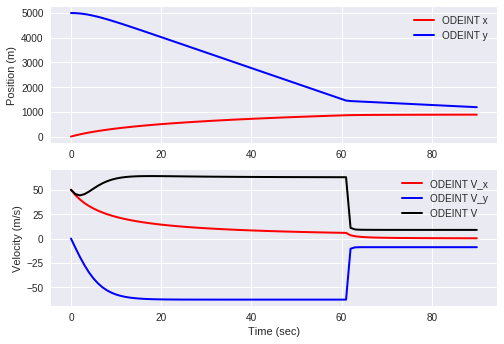

In [0]:
#@markdown Solution using python ODEINT


### Sequential method with SciPy.integrate.odeint
import numpy as np
from scipy.integrate import odeint
from apm import *

def skydive(z,t):
    # constants
    g = 9.81 # m/s^2, gravitational constant
    m = 80   # kg, mass of skydiver and pack
    if t<61:
        c = 0.2  # N-s^2/m^2, drag coefficient, chute closed
    else:
        c = 10.0 # N-s^2/m^2, drag coefficient, chute open

    # states (z)
    x = z[0]  # meters, horizontal position 
    y = z[1]  # meters, vertical position / elevation
    vx = z[2] # m/s, skydiver horizontal velocity = airplane velocity
    vy = z[3] # m/s, skydiver vertical velocity

    # derived values
    v = np.sqrt(vx**2+vy**2) # m/s, magnitude of velocity
    Fx = -c * vx**2
    Fy = -m*g + c*vy**2

    # calculate derivatives
    dxdt = vx
    dydt = vy
    dvxdt = Fx / m
    dvydt = Fy / m
    dzdt = [dxdt,dydt,dvxdt,dvydt]    

    return dzdt

# initial conditions
z0 = [0,5000,50,0]
# time points
t = np.linspace(0,90,91)
# solve
z1 = odeint(skydive,z0,t)

# parse results
x = z1[:,0]
y = z1[:,1]
vx = z1[:,2]
vy = z1[:,3]
v = np.sqrt(vx**2+vy**2)



# ### Simultaneous method with APMonitor
# install and load APMonitor
# try:
#     from APMonitor import *
# except:
#     import pip
#     pip.main(['install','APMonitor'])    
#     from APMonitor import *

# # solve model
# z2 = apm_solve('skydiver',7)


### Plot results
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(t,x,'r-',linewidth=2)
plt.plot(t,y,'b-',linewidth=2)
#plt.plot(z2['time'],z2['x'],'r:',linewidth=3)
#plt.plot(z2['time'],z2['y'],'b--',linewidth=3)
plt.ylabel('Position (m)')
plt.legend(['ODEINT x','ODEINT y','APM x','APM y'])

plt.subplot(2,1,2)
plt.plot(t,vx,'r-',linewidth=2)
plt.plot(t,vy,'b-',linewidth=2)
plt.plot(t,v,'k-',linewidth=2)
#plt.plot(z2['time'],z2['vx'],'r--',linewidth=3)
#plt.plot(z2['time'],z2['vy'],'b--',linewidth=3)
#plt.plot(z2['time'],z2['v'],'k--',linewidth=3)
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (m/s)')
plt.legend(['ODEINT V_x','ODEINT V_y','ODEINT V',\
            'APM V_x','APM V_y','APM V'])

# plt.figure(2)
#plt.plot(z2['x'],z2['y'],'r-')
# plt.xlabel('Position (x)')
# plt.ylabel('Position (y)')
plt.show()


In [0]:
#@markdown Solution using Gekko

try:
    from pip import main as pipmain
except:
    from pip._internal import main as pipmain
pipmain(['install','gekko'])

from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

#number of points in time discretization
n = 91

#Initialize Model
m = GEKKO(remote=False)

#define time discretization
m.time = np.linspace(0,90,n)

#make array of drag coefficients, changing at time 60
drag = [(0.2 if t<=60 else 10) for t in m.time]

#define constants
g = m.Const(value=9.81)
mass = m.Const(value=80)

#define drag parameter
d = m.Param(value=drag)

#initialize variables
x,y,vx,vy,v,Fx,Fy = [m.Var(value=0) for i in range(7)]

#initial conditions
y.value = 5000
vx.value = 50

#Equations
# force balance
m.Equation(Fx == -d * vx**2)
m.Equation(Fy == -mass*g + d*vy**2)
#F = ma
m.Equation(Fx/mass == vx.dt())
m.Equation(Fy/mass == vy.dt())
#vel = dxdt
m.Equation(vx == x.dt())
m.Equation(vy == y.dt())
#total velocity
m.Equation(v == (vx**2 + vy**2)**.5)

#Set global options
m.options.IMODE = 4 #dynamic simulation

#Solve simulation
m.solve()

#%% Plot results
plt.figure()
plt.plot(x.value,y.value)
plt.xlabel('x')
plt.ylabel('y')

plt.figure()
plt.plot(m.time,x.value,label='x')
plt.plot(m.time,y.value,label='y')
plt.xlabel('time')
plt.legend()

plt.figure()
plt.plot(m.time,vx.value,label='vx')
plt.plot(m.time,vy.value,label='vy')
plt.xlabel('time')
plt.legend()

plt.show()
